<a href="https://colab.research.google.com/github/urieliram/statistical/blob/main/Tarea6_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
import matplotlib
from statsmodels.nonparametric.smoothers_lowess import lowess
from mpl_toolkits.mplot3d import Axes3D # Axes3D import has side effects, it enables using projection='3d' in add_subplot
from math import ceil
from scipy import linalg
from os import listdir
from numpy.linalg import *
from scipy.stats.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import statsmodels.tools.eval_measures as bias
import statsmodels.api as sm
from sklearn.neighbors import KernelDensity
from statsmodels.nonparametric.kernel_regression import KernelReg

**EJEMPLOS DE REGRESIÓN LINEAL LOCAL NO-PARAMÉTRICA CON UNA DIMENSIÓN**

In [ ]:
df   = pd.read_csv('demanda.csv')
X       = pd.DataFrame(df[['X1','X2']]).to_numpy()
Y       = pd.DataFrame(df[['Y']]).to_numpy()

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


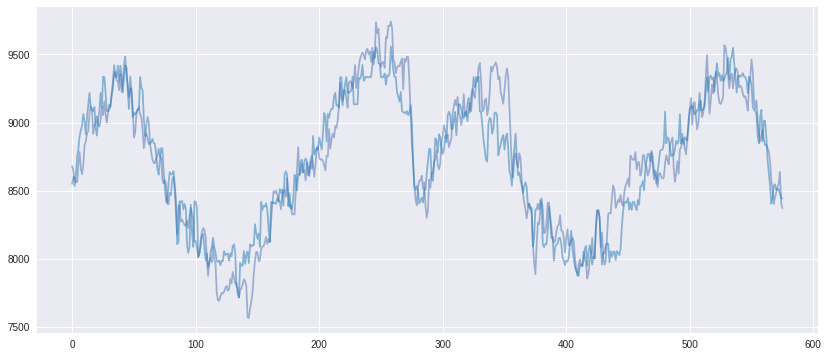

In [ ]:
n     = dfdem.shape[0]
exog  = dfdem[['X1']]
endog = dfdem['Y']
kde = KernelReg(endog=endog, exog=exog, var_type='c', bw=[15])

estimator = kde.fit(dfdem['X1'])

estimator = np.reshape(estimator[0],n)
print(type(estimator),type(estimator))
fig, ax   = plt.subplots(figsize=(14,6))
ax.plot( dfdem['Y'], '-',alpha=0.5)
ax.plot( estimator, '-', color='tab:blue', alpha=0.5)
#ax.set_ylim(bottom=10000, top=9500)
plt.show()

## Ejemplo 1

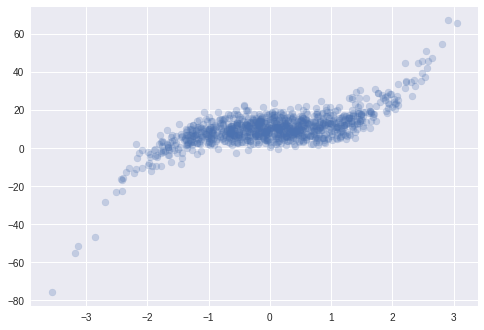

In [ ]:
plt.style.use("seaborn")
np.random.seed(8)
X = np.random.randn(1000,1)
Y = 2*(X**3) + 10 + 4.6*np.random.randn(1000,1)
plt.scatter(X, Y, alpha=0.25)
plt.show()

In [ ]:
# Weight Matrix in code. It is a diagonal matrix.
def weightmatrix(point, X, tau): 
    
  # tau   --> bandwidth
  # X     --> Training data.
  # point --> the x where we want to make the prediction.
    
  # m is the No of training examples .
    m = X.shape[0] 
    
  # Initialising W as an identity matrix.
    weight = np.mat(np.eye(m)) 
    
  # Calculating weights for all training examples [x(i)'s].
    for i in range(m): 
        xi = X[i] 
        d = (-2 * tau * tau) 
        weight[i, i] = np.exp(np.dot((xi-point), (xi-point).T)/d) 
        
    return weight

In [ ]:
def predict(X, y, point, tau): 
    
   # m = number of training examples. 
    m = X.shape[0] 
    
   # Appending a cloumn of ones in X to add the bias term.
   ###  Just one parameter: theta, that's why adding a column of ones        
   #### to X and also adding a 1 for the point where we want to          
   #### predict. 
    X_ = np.append(X, np.ones(m).reshape(m,1), axis=1) 
    
   # point is the x where we want to make the prediction. 
    point_ = np.array([point, 1]) 
    
   # Calculating the weight matrix using the weight matrix function we wrote      #  # earlier. 
    weight = weightmatrix(point_, X_, tau) 
    
  # Calculating parameter theta using the formula.
    theta = np.linalg.pinv(X_.T*(weight * X_))*(X_.T*(weight * y)) 
    
  # Calculating predictions.  
    pred = np.dot(point_, theta) 
    
   # Returning the theta and predictions 
    return theta, pred

In [ ]:
def plot_predictions(X, y, tau, nval):
   # X --> Training data. 
   # y --> Output sequence.
   # nval --> number of values/points for which we are going to
   # predict.
   # tau --> the bandwidth.     
   # The values for which we are going to predict.
   # X_test includes nval evenly spaced values in the domain of X.
    X_test = np.linspace(-3, 3, nval) 
    
   # Empty list for storing predictions. 
    preds = [] 
    
   # Predicting for all nval values and storing them in preds. 
    for point in X_test: 
        theta, pred = predict(X, y, point, tau) 
        preds.append(pred)
        
   # Reshaping X_test and preds
    X_test = np.array(X_test).reshape(nval,1)
    preds = np.array(preds).reshape(nval,1)
    
   # Plotting 
    plt.plot(X, y, 'b.')
    plt.plot(X_test, preds, 'r.') # Predictions in red color.
    plt.show()

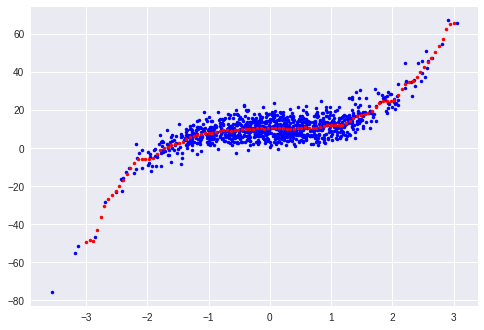

In [ ]:
plot_predictions(X, Y, 0.08, 100)

## Ejemplo 2 (tips.csv)

(244, 2)


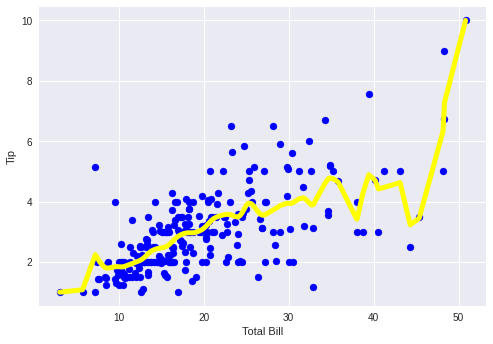

In [ ]:
#https://www.codespeedy.com/locally-weighted-linear-regression-in-python/
# kernel smoothing function
def kernel(point, xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2.0 * k**2))
    
    return weights
    
# function to return local weight of eah traiining example
def localWeight(point, xmat, ymat, k):
    wt = kernel(point, xmat, k)
    W = (X.T * (wt*X)).I * (X.T * wt * ymat.T)
    return W

# root function that drives the algorithm
def localWeightRegression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    
    for i in range(m):
        ypred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, k)
        
    return ypred

#import data
data = pd.read_csv('tips.csv')

# place them in suitable data types
colA = np.array(data.total_bill)
colB = np.array(data.tip)
mcolA = np.mat(colA)
mcolB = np.mat(colB)
m = np.shape(mcolB)[1]
one = np.ones((1, m), dtype = int)

# horizontal stacking
X = np.hstack((one.T, mcolA.T))
print(X.shape)

# predicting values using LWLR
ypred = localWeightRegression(X, mcolB, 0.8)

# plotting the predicted graph
xsort = X.copy()
xsort.sort(axis=0)
plt.scatter(colA, colB, color='blue')
plt.plot(xsort[:, 1], ypred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

In [ ]:
df = pd.read_csv('tips.csv')
features = np.array(df.total_bill)
labels = np.array(df.tip)
m = features.shape[0]
mtip = np.mat(labels)
data = np.hstack((np.ones((m, 1)), np.mat(features).T))

In [ ]:
def kernel(data, point, xmat, k):
    m,n = np.shape(xmat)
    ws = np.mat(np.eye((m)))
    
    for j in range(m):
        diff = point - data[j]
        ws[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return ws
 
def local_weight(data, point, xmat, ymat, k):
    wei = kernel(data, point, xmat, k)
    return (data.T*(wei*data)).I*(data.T*(wei*ymat.T))
     
def local_weight_regression(xmat, ymat, k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*local_weight(xmat, xmat[i],xmat,ymat,k)
    return ypred

In [ ]:
ypred = local_weight_regression(data, mtip, 0.5)
indices = data[:,1].argsort(0)
xsort = data[indices][:,0]

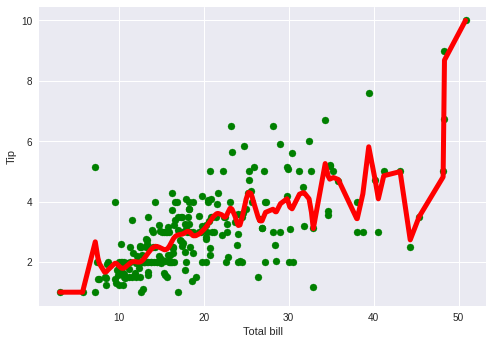

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(features, labels, color='green')
ax.plot(xsort[:,1],ypred[indices], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();

## Ejemplo 3

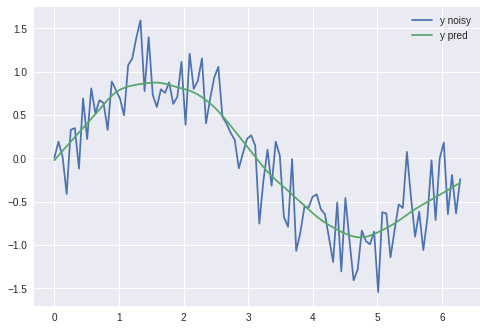

In [ ]:
# https://gist.github.com/agramfort/850437#
# Authors: Alexandre Gramfort <alexandre.gramfort@telecom-paristech.fr>
#
# License: BSD (3-clause)
def lowess(x, y, f=2. / 3., iter=3):
    """lowess(x, y, f=2./3., iter=3) -> yest
    Lowess smoother: Robust locally weighted regression.
    The lowess function fits a nonparametric regression curve to a scatterplot.
    The arrays x and y contain an equal number of elements; each pair
    (x[i], y[i]) defines a data point in the scatterplot. The function returns
    the estimated (smooth) values of y.
    The smoothing span is given by f. A larger value for f will result in a
    smoother curve. The number of robustifying iterations is given by iter. The
    function will run faster with a smaller number of iterations.
    """
    n = len(x)
    r = int(ceil(f * n))
    h = [np.sort(np.abs(x - x[i]))[r] for i in range(n)]
    w = np.clip(np.abs((x[:, None] - x[None, :]) / h), 0.0, 1.0)
    w = (1 - w ** 3) ** 3
    yest = np.zeros(n)
    delta = np.ones(n)
    for iteration in range(iter):
        for i in range(n):
            weights = delta * w[:, i]
            b = np.array([np.sum(weights * y), np.sum(weights * y * x)])
            A = np.array([[np.sum(weights), np.sum(weights * x)],
                          [np.sum(weights * x), np.sum(weights * x * x)]])
            beta = linalg.solve(A, b)
            yest[i] = beta[0] + beta[1] * x[i]

        residuals = y - yest
        s = np.median(np.abs(residuals))
        delta = np.clip(residuals / (6.0 * s), -1, 1)
        delta = (1 - delta ** 2) ** 2

    return yest

if __name__ == '__main__':
    import math
    n = 100
    x = np.linspace(0, 2 * math.pi, n)
    y = np.sin(x) + 0.3 * np.random.randn(n)

    f = 0.25
    yest = lowess(x, y, f=f, iter=3)

    import pylab as pl
    pl.clf()
    pl.plot(x, y, label='y noisy')
    pl.plot(x, yest, label='y pred')
    pl.legend()
    pl.show()

Ejemplo 4: Uso de estimnación de kernel con librería

In [ ]:
R= np.asarray([2,4,5,6,7,8,5,6,3,2,4,7,3,4,2,4,6,8,5,3,45,6,8,9,6,4,6,8,3,4,3,1,2,5,9,8,4,7,6,5,3,2,5,7,3,5,3,2,4,5,2,6,7,5,5])
import numpy as np
rng = np.random.RandomState(42)
R = rng.random_sample((100, 3))
kdeGauss = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(R)
log_density = kdeGauss.score_samples(R[:3])

kdeEspane = KernelDensity(kernel='epanechnikov', bandwidth=0.05).fit(R)
